## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [10]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoc

50000/50000 [==============================] - 3s 53us/step - loss: 1.4364 - acc: 0.4960 - val_loss: 1.6833 - val_acc: 0.4311
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0126 - acc: 0.2810 - val_loss: 1.8562 - val_acc: 0.3501
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7991 - acc: 0.3676 - val_loss: 1.7508 - val_acc: 0.3882
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7135 - acc: 0.3967 - val_loss: 1.6824 - val_acc: 0.4113
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6566 - acc: 0.4194 - val_loss: 1.6314 - val_acc: 0.4326
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6103 - acc: 0.4358 - val_loss: 1.5983 - val_acc: 0.4392
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5707 - acc: 0.4493 - val_loss: 1.5607 - val_acc: 0.4550
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5367 - acc: 0.4606 - val_loss: 1.5486 - val_acc

50000/50000 [==============================] - 3s 53us/step - loss: 2.1304 - acc: 0.2473 - val_loss: 2.0900 - val_acc: 0.2649
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0505 - acc: 0.2797 - val_loss: 2.0233 - val_acc: 0.2928
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9929 - acc: 0.3018 - val_loss: 1.9728 - val_acc: 0.3022
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9481 - acc: 0.3178 - val_loss: 1.9347 - val_acc: 0.3198
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9134 - acc: 0.3302 - val_loss: 1.9046 - val_acc: 0.3337
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8860 - acc: 0.3400 - val_loss: 1.8790 - val_acc: 0.3448
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8636 - acc: 0.3499 - val_loss: 1.8609 - val_acc: 0.3530
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2432 - acc: 0.1827 - val_loss: 2.2335 - val_acc: 0.1928
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2280 - acc: 0.1947 - val_loss: 2.2193 - val_acc: 0.2046
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2138 - acc: 0.2073 - val_loss: 2.2057 - val_acc: 0.2140
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2004 - acc: 0.2158 - val_loss: 2.1932 - val_acc: 0.2213
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1880 - acc: 0.2237 - val_loss: 2.1815 - val_acc: 0.2288
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1765 - acc: 0.2301 - val_loss: 2.1706 - val_acc: 0.2372
Epoch 10/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1656 - acc: 0.2371 - val_loss: 2.1601 - val_acc: 0.2404
Epoch 11/50
50000/50000 [===============

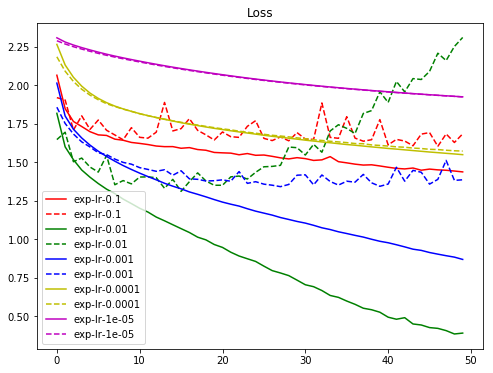

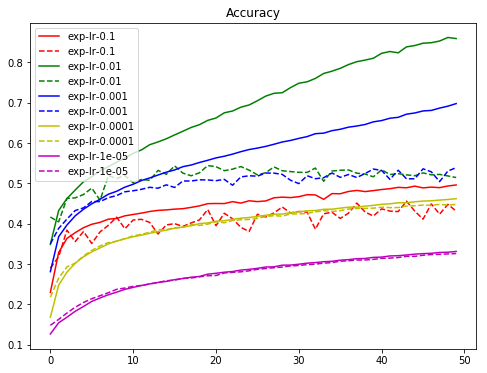

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9122 - acc: 0.3069 - val_loss: 1.7267 - val_acc: 0.3847
Epoch 2/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6910 - acc: 0.3932 - val_loss: 1.6564 - val_acc: 0.3955
Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5980 - acc: 0.4296 - val_loss: 1.6084 - val_acc: 0.4288
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5567 - acc: 0.4445 - val_loss: 1.5350 - val_acc: 0.4439
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4960 - acc: 0.4646 - val_loss: 1.5240 - val_acc: 0.4599
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4665 - acc: 0.4751 - val_loss: 1.4926 - val_acc: 0.4671
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4216 - acc: 0.4917 - val_loss: 1.4545 - val_acc

50000/50000 [==============================] - 3s 53us/step - loss: 1.8114 - acc: 0.3642 - val_loss: 1.7668 - val_acc: 0.3757
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7324 - acc: 0.3913 - val_loss: 1.6984 - val_acc: 0.4084
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6767 - acc: 0.4117 - val_loss: 1.6458 - val_acc: 0.4285
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6339 - acc: 0.4270 - val_loss: 1.6290 - val_acc: 0.4228
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5924 - acc: 0.4416 - val_loss: 1.5831 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5628 - acc: 0.4518 - val_loss: 1.5755 - val_acc: 0.4409
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5312 - acc: 0.4632 - val_loss: 1.5487 - val_acc: 0.4545
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 56us/step - loss: 2.0524 - acc: 0.2843 - val_loss: 2.0243 - val_acc: 0.2908
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9973 - acc: 0.3031 - val_loss: 1.9750 - val_acc: 0.3074
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9536 - acc: 0.3212 - val_loss: 1.9369 - val_acc: 0.3167
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9191 - acc: 0.3338 - val_loss: 1.9072 - val_acc: 0.3299: 0s - loss: 1.9220 - acc: 0.
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8909 - acc: 0.3435 - val_loss: 1.8816 - val_acc: 0.3406
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8680 - acc: 0.3502 - val_loss: 1.8623 - val_acc: 0.3500
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8484 - acc: 0.3595 - val_loss: 1.8437 - val_acc: 0.3573
Epoch 10/50
50000/50000

50000/50000 [==============================] - 3s 57us/step - loss: 2.2225 - acc: 0.1995 - val_loss: 2.2116 - val_acc: 0.2138
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2043 - acc: 0.2124 - val_loss: 2.1944 - val_acc: 0.2226
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1880 - acc: 0.2236 - val_loss: 2.1790 - val_acc: 0.2329
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1731 - acc: 0.2320 - val_loss: 2.1647 - val_acc: 0.2420
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.1593 - acc: 0.2405 - val_loss: 2.1515 - val_acc: 0.2487
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.1464 - acc: 0.2466 - val_loss: 2.1391 - val_acc: 0.2534
Epoch 10/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1342 - acc: 0.2523 - val_loss: 2.1273 - val_acc: 0.2568
Epoch 11/50
50000/50000 [==========================

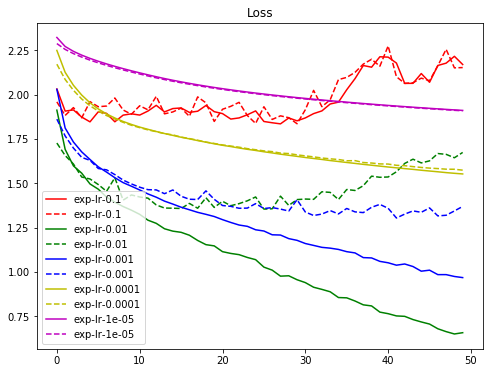

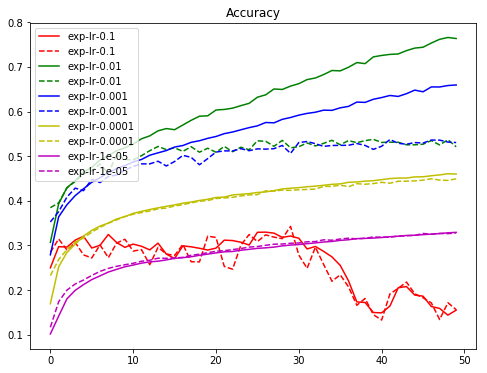

In [13]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()